In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('ArchiveII_with_prob_and_motiv.csv')
df_splits = pd.read_csv('cdhit_split.csv')
display(df.head(2))
display(df_splits.head(2))
df['motifs'] = df['motivos']

,id,sequence,structure,base_pairs,len,motivos,fam,pseudo_probe
0,5s_Acholeplasma-laidlawii-1,UCUGGUGACGAUAGGUAAGAUGGUUCACCUGUUCCCAUCCCGAACA...,((((((((......((((((((....((((((.............)...,"[[1, 111], [2, 110], [3, 109], [4, 108], [5, 1...",112,SSSSSSSSMMMMMMSSSSSSSSIIIISSSSSSHHHHHHHHHHHHHS...,5s,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, ..."
1,5s_Acidovorax-temperans-1,UGCCUGAUGACCAUAGCAAGUUGGUACCACUCCUUCCCAUCCCGAA...,.(((((((((.....((((((((.....((((((...............,"[[2, 115], [3, 114], [4, 113], [5, 112], [6, 1...",115,ESSSSSSSSSMMMMMSSSSSSSSIIIIISSSSSSHHHHHHHHHHHH...,5s,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, ..."


,id,sequence,structure,base_pairs,len,fam,fold,partition
0,5s_Acholeplasma-laidlawii-1,UCUGGUGACGAUAGGUAAGAUGGUUCACCUGUUCCCAUCCCGAACA...,((((((((......((((((((....((((((.............)...,"[[1, 111], [2, 110], [3, 109], [4, 108], [5, 1...",112,5s,0,test
1,5s_Acholeplasma-laidlawii-1,UCUGGUGACGAUAGGUAAGAUGGUUCACCUGUUCCCAUCCCGAACA...,((((((((......((((((((....((((((.............)...,"[[1, 111], [2, 110], [3, 109], [4, 108], [5, 1...",112,5s,1,train


In [4]:
df_all = pd.merge(df_splits, df[['id', 'pseudo_probe', 'motifs']], how='left', on='id')

In [5]:
for fold in df_all.fold.unique():
    for partition in df_all.partition.unique():
        d = df_all.query('partition == @partition and fold == @fold')[['id', 'fam', 'sequence', 'len', 'structure', 'base_pairs', 'pseudo_probe', 'motifs']]
        d#.to_csv(f'ArchiveII_seq_sim_pp_motifs/{partition}_{fold}.csv')
display(d)

,id,fam,sequence,len,structure,base_pairs,pseudo_probe,motifs
39,5s_Tremella-mesenterica-1,5s,AUUCACGGCCACAGGAUUAAGAAAACACCGCAUCCCGUCCGAUCUG...,118,(.(((((((....(((((.(......((((((............))...,"[[1, 118], [3, 116], [4, 115], [5, 114], [6, 1...","[1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, ...",SISSSSSSSMMMMSSSSSISIIIIIISSSSSSHHHHHHHHHHHHSS...
44,5s_Coxiella-burnetii-2,5s,UUCCUGGCGGCCAUAGCGAGCGGGCCCCACCUGCUUCCAUUCCGAA...,118,...(((((((.......(((((......(((((................,"[[4, 115], [5, 114], [6, 113], [7, 112], [8, 1...","[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, ...",EEESSSSSSSMMMMMMMSSSSSIIIIIISSSSSHHHHHHHHHHHHH...
49,5s_Ganoderma-applanatum-1,5s,AUCCACGGCCAUAGGACUCCGAAAGCACCGCAUCCCGUCCGAUCUG...,118,(.(((((((....((((((((.....((((((............))...,"[[1, 118], [3, 116], [4, 115], [5, 114], [6, 1...","[1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, ...",SISSSSSSSMMMMSSSSSSSSIIIIISSSSSSHHHHHHHHHHHHSS...
59,5s_Beggiatoa-alba-1,5s,UUCUUGGCGACCAUAGCAAAUAGGAACCACCCGACCCCAUCCCGAA...,120,((((((((((.....((.(((((.....((((((...............,"[[1, 119], [2, 118], [3, 117], [4, 116], [5, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, ...",SSSSSSSSSSMMMMMSSISSSSSIIIIISSSSSSHHHHHHHHHHHH...
69,5s_Pseudomonas-fluorescens-1,5s,UUCUUGACGACCAUAGAGCGUUGGAACCACCUGAUCCCAUCCCGAA...,120,.(((((((((.....((((((((.....((((((...............,"[[2, 118], [3, 117], [4, 116], [5, 115], [6, 1...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, ...",ESSSSSSSSSMMMMMSSSSSSSSIIIIISSSSSSHHHHHHHHHHHH...
...,...,...,...,...,...,...,...,...
11454,5s_Porphyromonas-gingivalis-2,5s,UCAGGUGGUUAUAACGUUGGGGAUCCACCUCUUCCCAUUCCGAACA...,108,...(((((.....((((((((.....((((((.............)...,"[[4, 107], [5, 106], [6, 105], [7, 104], [8, 1...","[0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, ...",EEESSSSSMMMMMSSSSSSSSIIIIISSSSSSHHHHHHHHHHHHHS...
11499,tRNA_tdbR00000413-Candida_cylindracea-44322-Se...,tRNA,GUUAAUGUGGCCCGAGUGGUUAAGGCGCUUCCCUGCUAAGGAAGUG...,86,(((((((..(((...........)))((((((.......))))))....,"[[1, 82], [2, 81], [3, 80], [4, 79], [5, 78], ...","[1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, ...",SSSSSSSMMSSSHHHHHHHHHHHSSSSSSSSSHHHHHHHSSSSSSM...
11529,5s_Lentinula-edodes-2,5s,AUCCACGGCCAUAGGACUCUGAAAGAACCGCAUCCCGUCUGAUCUG...,120,(.(.(((((....((((((((.....((((((............))...,"[[1, 118], [3, 116], [5, 114], [6, 113], [7, 1...","[1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, ...",SISISSSSSMMMMSSSSSSSSIIIIISSSSSSHHHHHHHHHHHHSS...
11574,tRNA_tdbR00000521-Bos_taurus-9913-Ini-CAU,tRNA,AGUAAGGUCAGCUAAUUAAGCUAUCGGGCCCAUACCCCGAAAAUGU...,72,((((.((..((((.....)))).(((((.......)))))....(....,"[[1, 68], [2, 67], [3, 66], [4, 65], [6, 63], ...","[1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, ...",SSSSISSMMSSSSHHHHHSSSSMSSSSSHHHHHHHSSSSSMMMMSI...


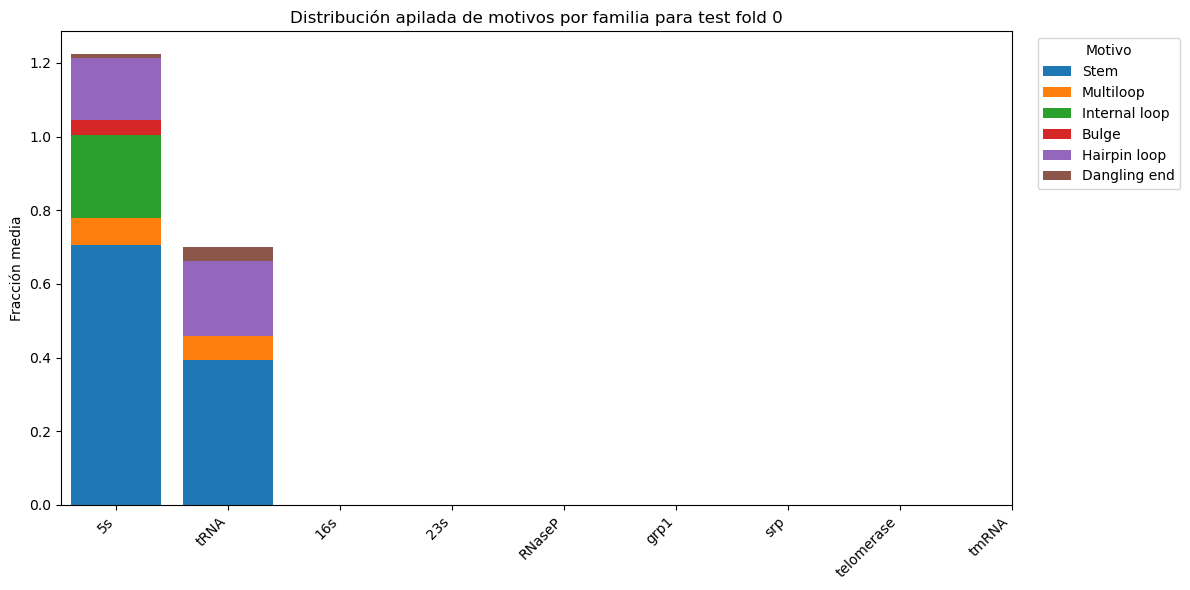

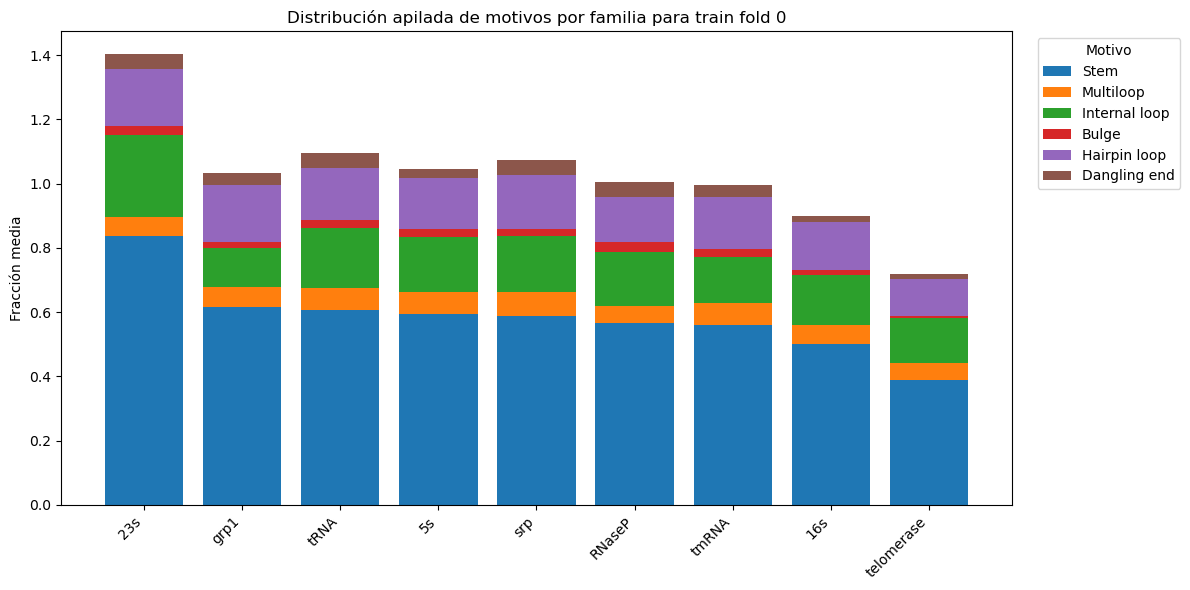

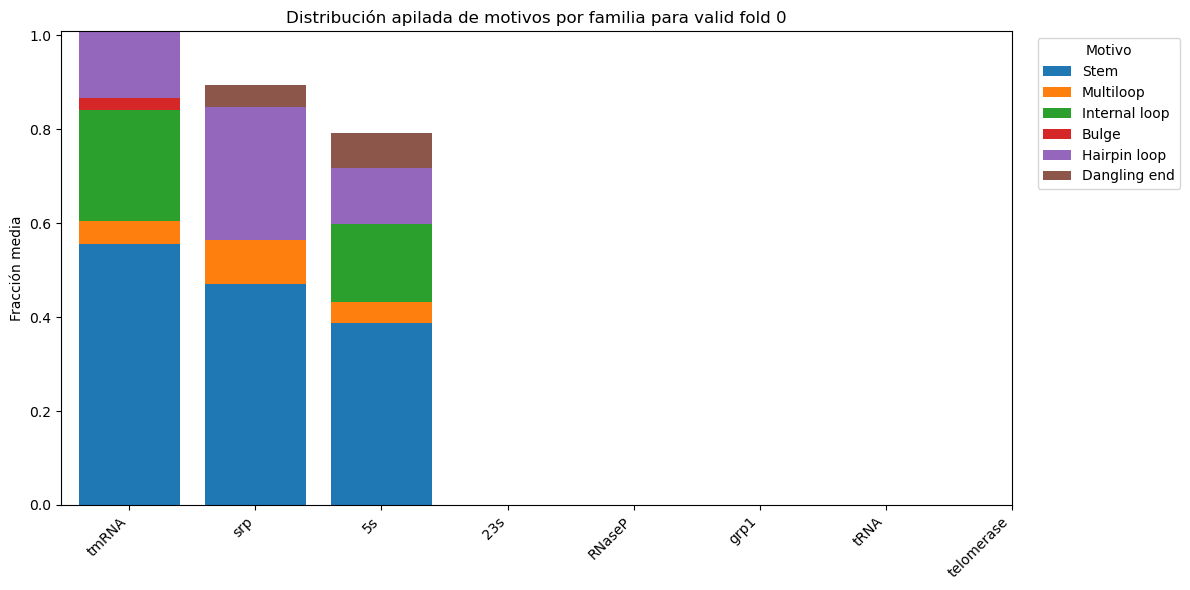

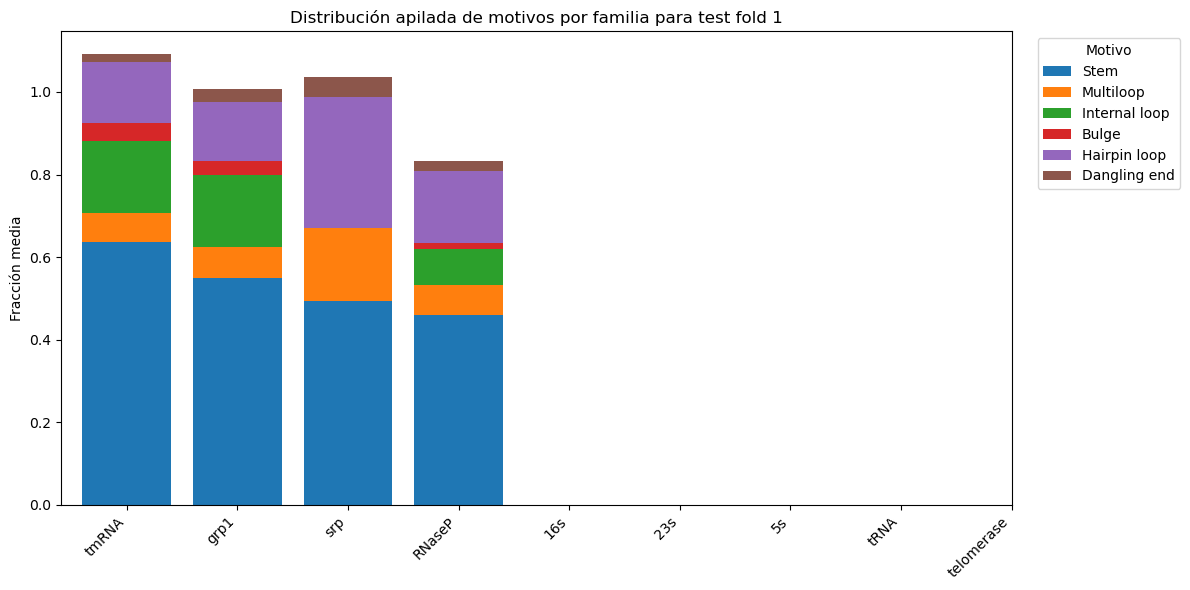

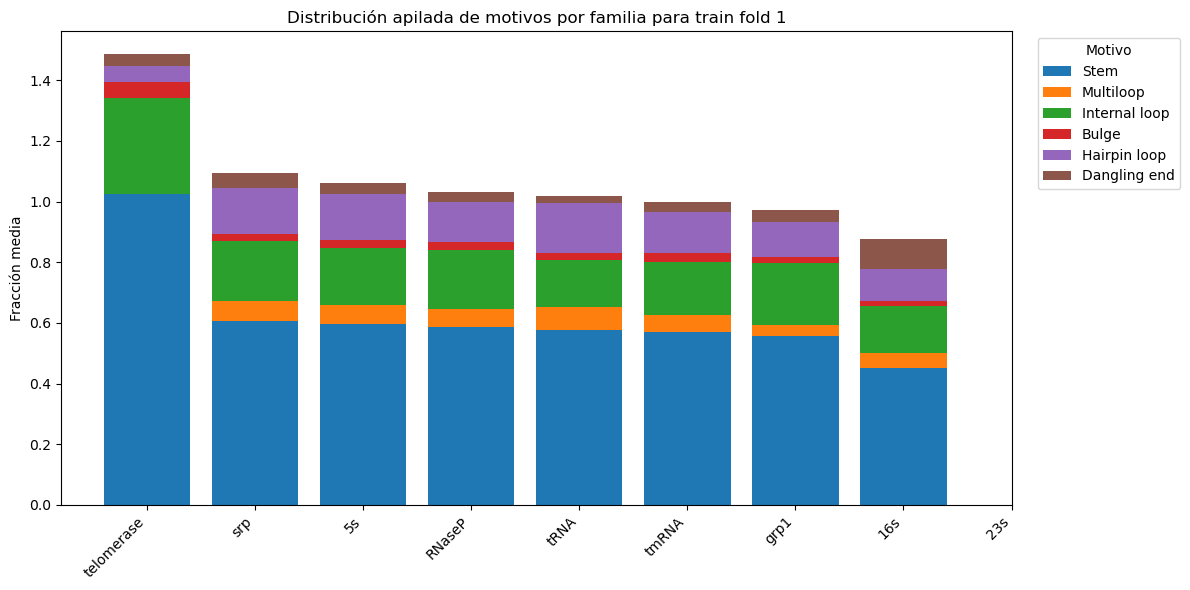

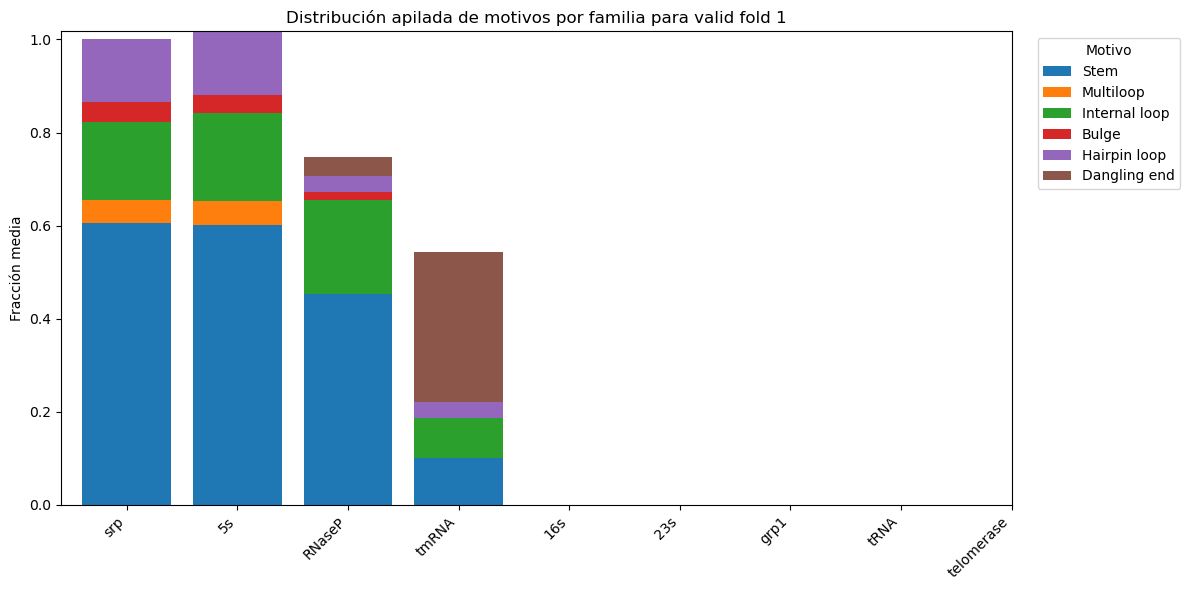

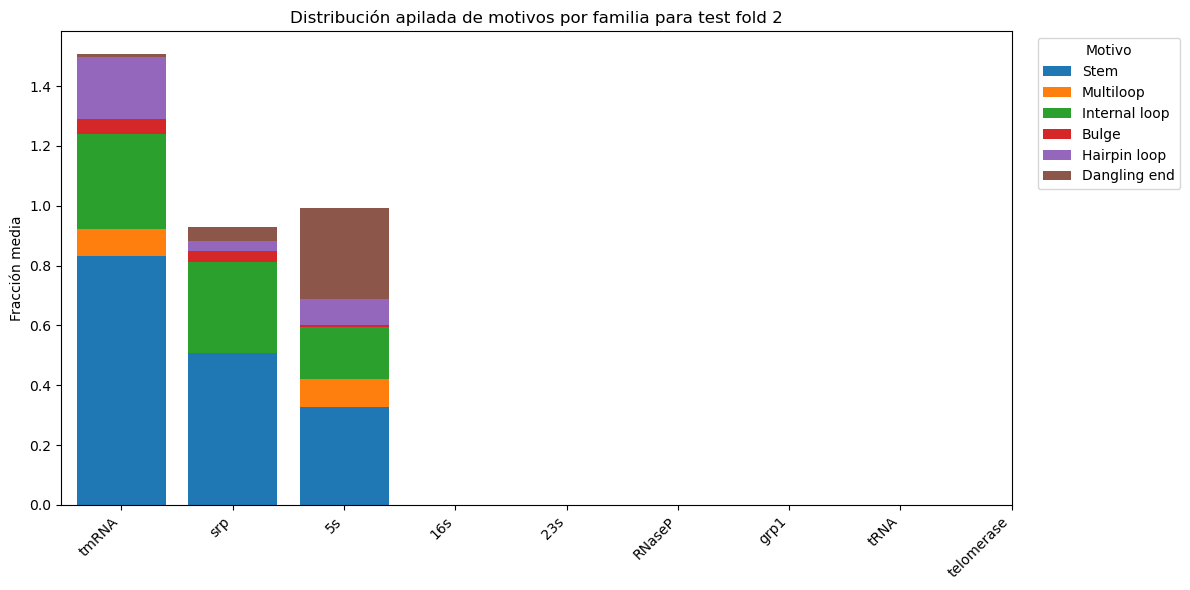

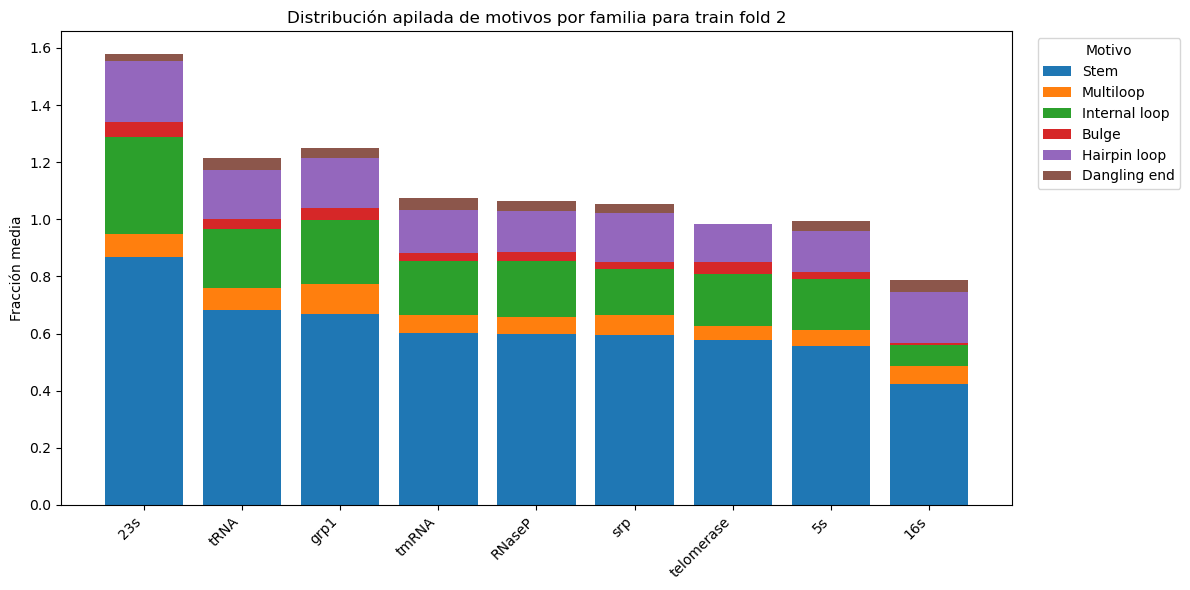

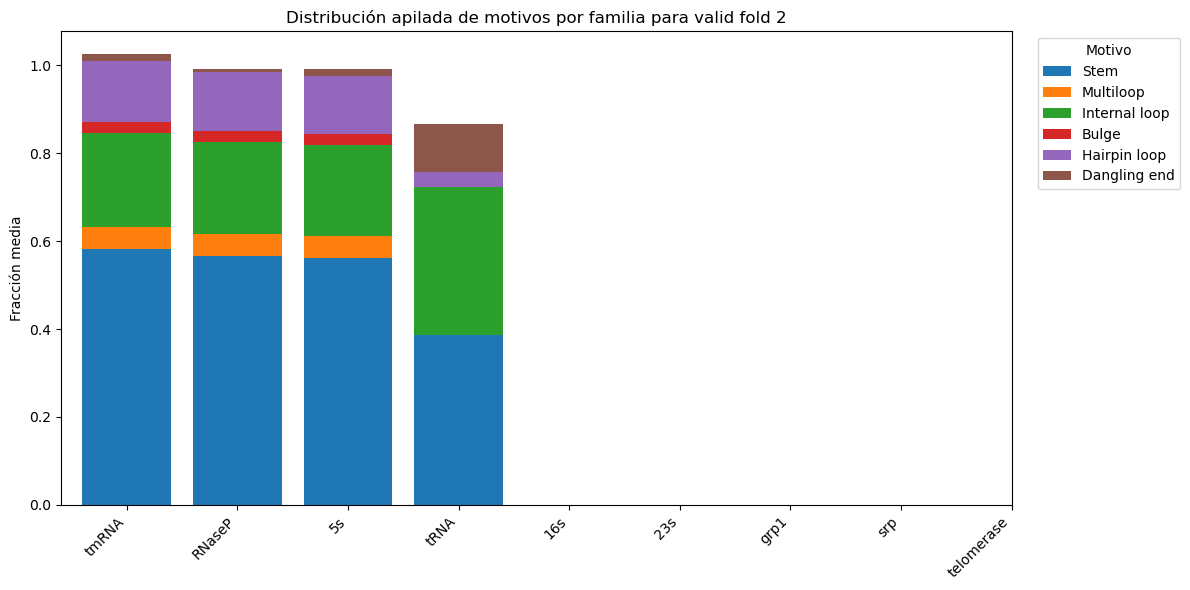

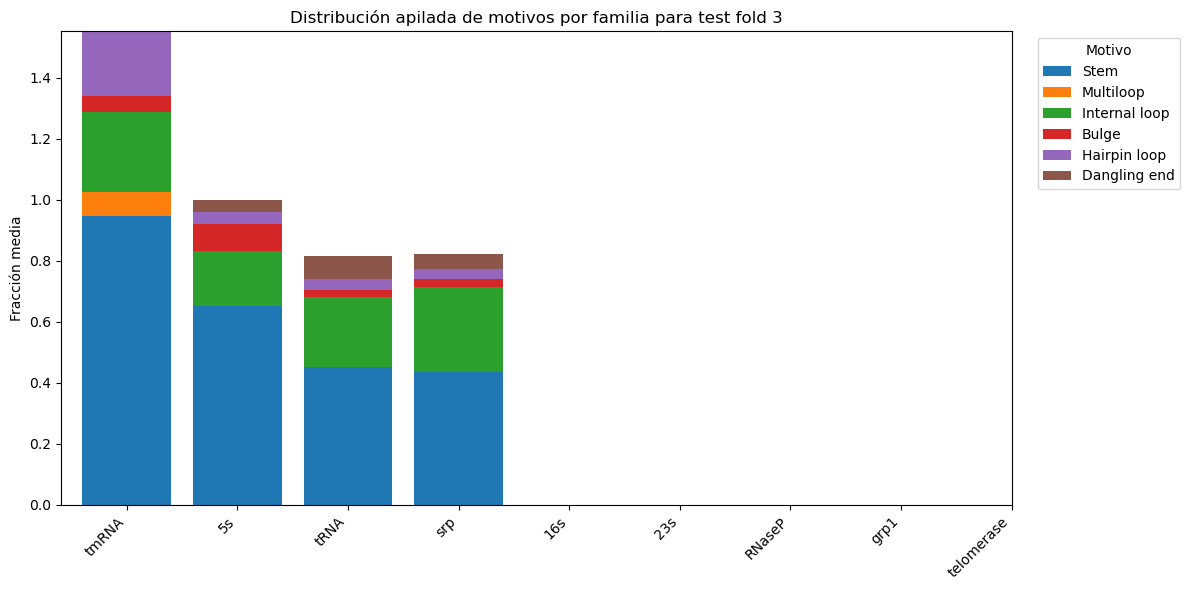

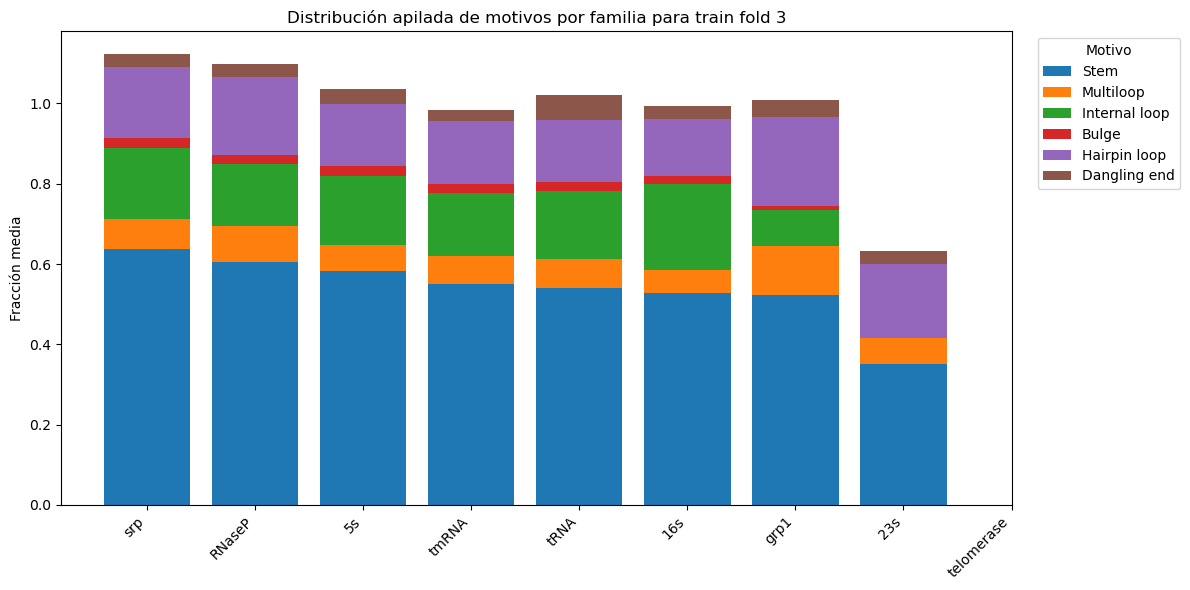

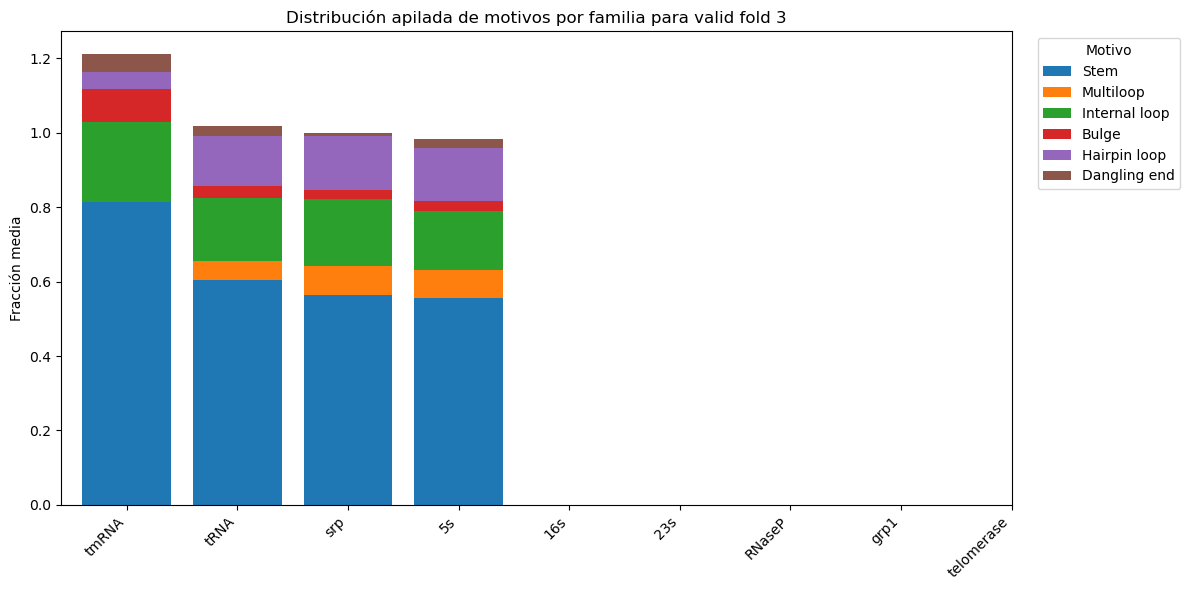

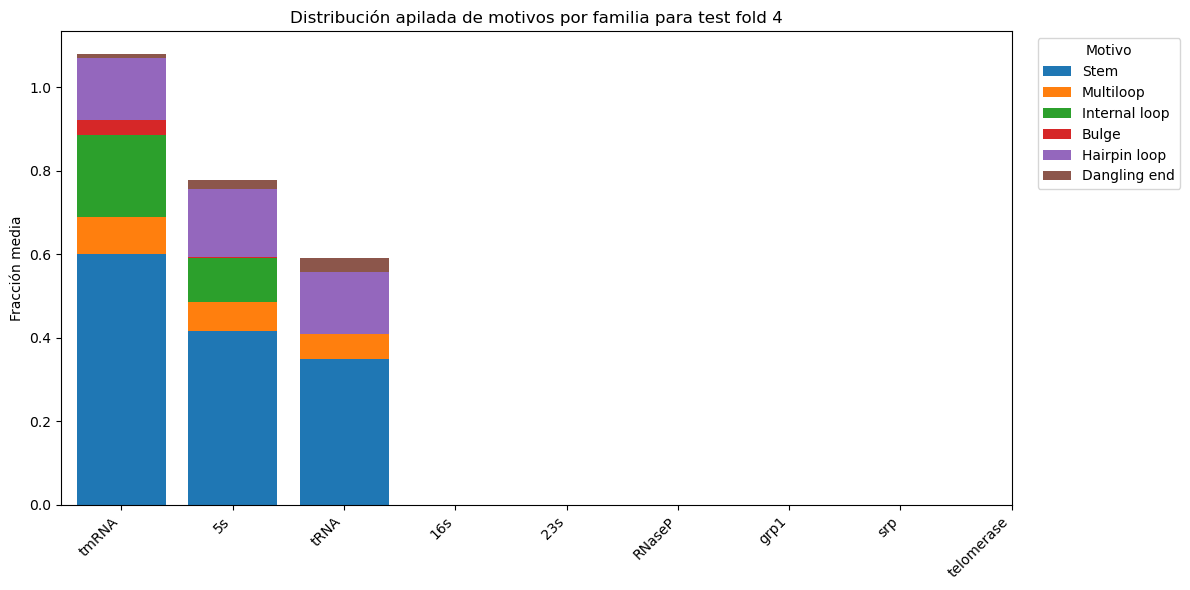

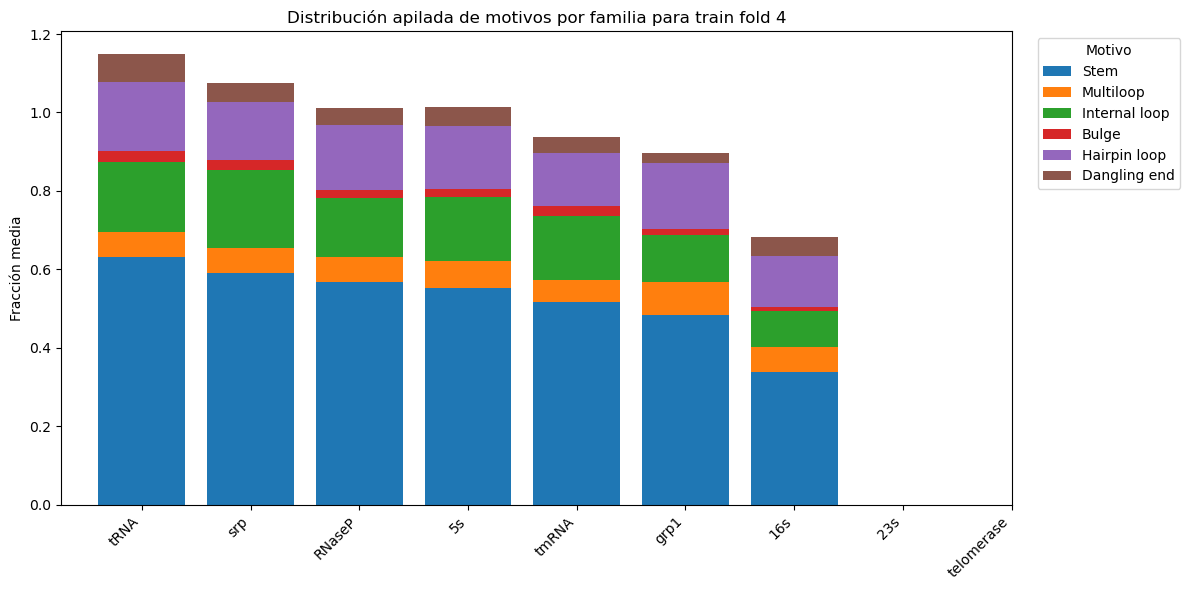

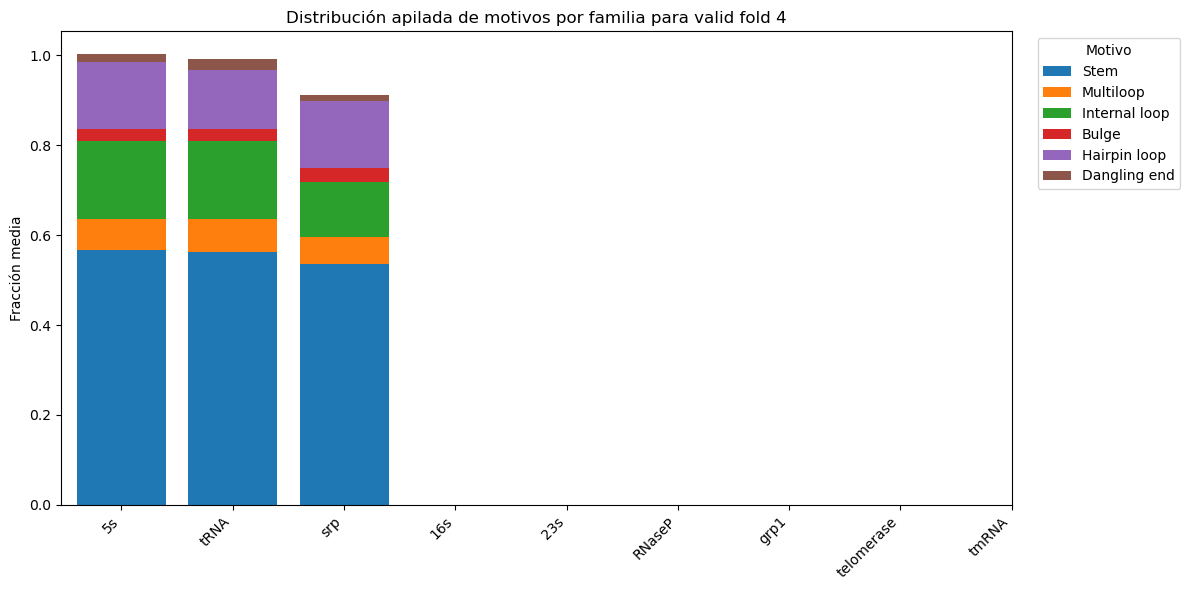

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# 1) Definir etiquetas y colores
label_types = ['S', 'M', 'I', 'B', 'H', 'E']
label_map = {
    'S': 'Stem',
    'M': 'Multiloop',
    'I': 'Internal loop',
    'B': 'Bulge',
    'H': 'Hairpin loop',
    'E': 'Dangling end'
}
cmap = plt.get_cmap('tab10')
label_colors = {lab: cmap(i % cmap.N) for i, lab in enumerate(label_types)}
for fold in df_all.fold.unique():
    for partition in df_all.partition.unique():
        d = df_all.query('partition == @partition and fold == @fold')[['id', 'fam', 'sequence', 'len', 'structure', 'base_pairs', 'pseudo_probe', 'motifs']]
        # 2) Calcular fracción por secuencia
        label_counts = d['motifs'].apply(lambda s: Counter(s))
        label_counts_df = pd.DataFrame(label_counts.tolist()).fillna(0)[label_types]
        label_frac_df = label_counts_df.div(d['len'], axis=0)

        # 3) Promedio de fracción por familia
        avg_frac_by_fam = (
            label_frac_df
            .assign(fam=df['fam'])
            .groupby('fam')
            .mean()
        )

        # 4) Definir nuevo orden de familias: primero S desc., luego I desc.
        fam_order = avg_frac_by_fam.sort_values(['S'], ascending=[False]).index.tolist()

        # 5) Gráfico de barras apiladas con fam_order
        fig, ax = plt.subplots(figsize=(12, 6))

        bottom = np.zeros(len(fam_order))
        for lab in label_types:
            vals = avg_frac_by_fam.loc[fam_order, lab].values
            ax.bar(
                fam_order,
                vals,
                bottom=bottom,
                label=label_map[lab],
                color=label_colors[lab]
            )
            bottom += vals

        ax.set_ylabel('Fracción media')
        ax.set_title(f'Distribución apilada de motivos por familia para {partition} fold {fold}')
        ax.set_xticks(range(len(fam_order)))
        ax.set_xticklabels(fam_order, rotation=45, ha='right')
        ax.legend(title='Motivo', bbox_to_anchor=(1.02, 1), loc='upper left')
        plt.tight_layout()
        plt.show()


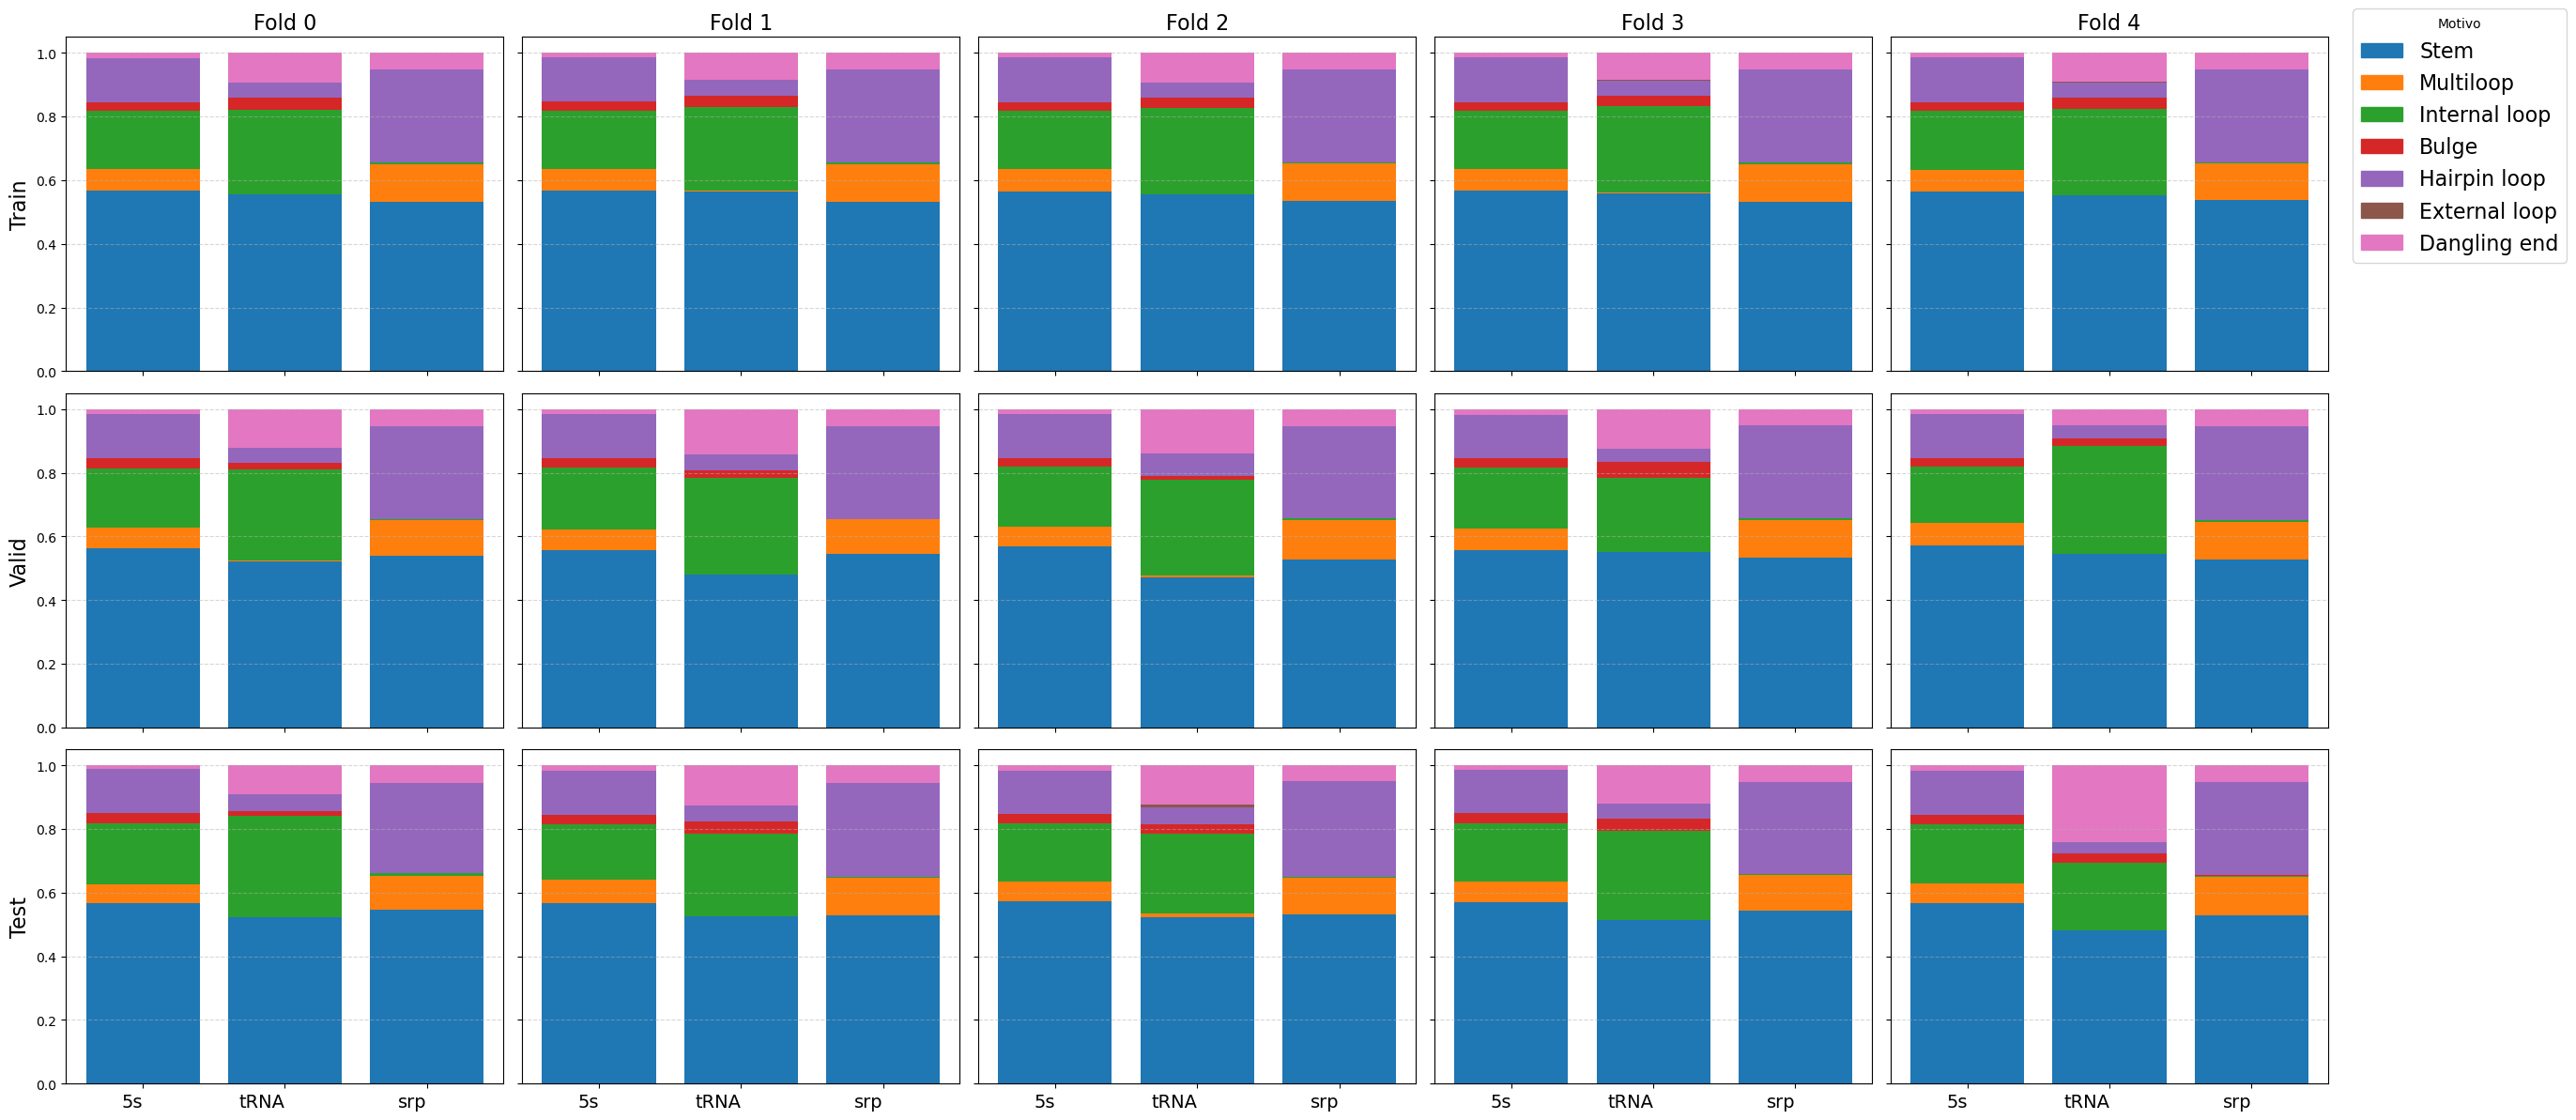

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# 1) Definir etiquetas, mapa de etiquetas, y colores
label_types = ['S', 'M', 'I', 'B', 'H', 'X', 'E']
label_map = {
    'S': 'Stem',
    'M': 'Multiloop',
    'I': 'Internal loop',
    'B': 'Bulge',
    'H': 'Hairpin loop',
    'X': 'External loop',
    'E': 'Dangling end'
}
cmap = plt.get_cmap('tab10')
label_colors = {lab: cmap(i % cmap.N) for i, lab in enumerate(label_types)}

# 2) Crear figura general
partitions = ['train', 'valid', 'test']
folds = sorted(df_all['fold'].unique())
nrows = len(partitions)
ncols = len(folds)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*4), sharey=True, sharex=True)

# 3) Recorrer particiones y folds
for i, partition in enumerate(partitions):
    for j, fold in enumerate(folds):
        ax = axes[i, j]
        
        # Filtrar datos para esta partición y fold
        d = df_all.query('partition == @partition and fold == @fold')[['id', 'fam', 'sequence', 'len', 'structure', 'base_pairs', 'pseudo_probe', 'motifs']]
        
        # Contar etiquetas por secuencia
        label_counts = d['motifs'].apply(lambda s: Counter(s))
        label_counts_df = pd.DataFrame(label_counts.tolist()).fillna(0)

        # Asegurar que todas las etiquetas estén
        for lab in label_types:
            if lab not in label_counts_df.columns:
                label_counts_df[lab] = 0
        label_counts_df = label_counts_df[label_types]

        # IMPORTANTÍSIMO: resetear índice para que coincida
        label_counts_df = label_counts_df.reset_index(drop=True)
        d = d.reset_index(drop=True)

        # Calcular suma de etiquetas relevantes
        total_counts = label_counts_df.sum(axis=1)

        # Filtrar secuencias sin motivos relevantes
        valid_idx = total_counts > 0
        label_counts_df = label_counts_df[valid_idx]
        d = d.loc[valid_idx]  # usa .loc

        # Calcular fracción
        label_frac_df = label_counts_df.div(total_counts.loc[valid_idx], axis=0)


        # Promedio de fracción por familia
        avg_frac_by_fam = label_frac_df.assign(fam=d['fam']).groupby('fam').mean()

        # Ordenar familias por 'S' descendente
        fam_order = avg_frac_by_fam.sort_values('S', ascending=False).index.tolist()

        # Dibujar barras apiladas
        bottom = np.zeros(len(fam_order))
        for lab in label_types:
            vals = avg_frac_by_fam.loc[fam_order, lab].values
            ax.bar(
                fam_order,
                vals,
                bottom=bottom,
                label=label_map[lab] if (i == 0 and j == 0) else "",  # Solo poner leyenda una vez
                color=label_colors[lab]
            )
            bottom += vals

        # Títulos y etiquetas
        if i == 0:
            ax.set_title(f'Fold {fold}', fontsize=16)
        if j == 0:
            ax.set_ylabel(f'{partition.capitalize()}', fontsize=16)

        ax.set_xticks(range(len(fam_order)))
        ax.set_xticklabels(fam_order, ha='right', fontsize=14)
        ax.grid(axis='y', linestyle='--', alpha=0.5)


# Crear leyenda aparte
handles = [plt.Rectangle((0,0),2,2, color=label_colors[lab]) for lab in label_types]
legend_labels = [label_map[lab] for lab in label_types]
fig.legend(handles, legend_labels, title="Motivo", bbox_to_anchor=(1, 1), loc='upper left', fontsize=16)
plt.tight_layout()
plt.show()


In [8]:
df_all.len.value_counts()

len
120    1745
119    1285
76      820
118     815
121     555
       ... 
56        5
39        5
38        5
60        5
42        5
Name: count, Length: 88, dtype: int64

/tmp/ipykernel_1234438/3086561337.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data.index, rotation=90, ha='right')
/tmp/ipykernel_1234438/3086561337.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data.index, rotation=90, ha='right')
/tmp/ipykernel_1234438/3086561337.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data.index, rotation=90, ha='right')
/tmp/ipykernel_1234438/3086561337.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data.index, rotation=90, ha='right')
/tmp/ipykernel_1234438/3086561337.py:39: UserWarning: set_ticklabels() should only be used w

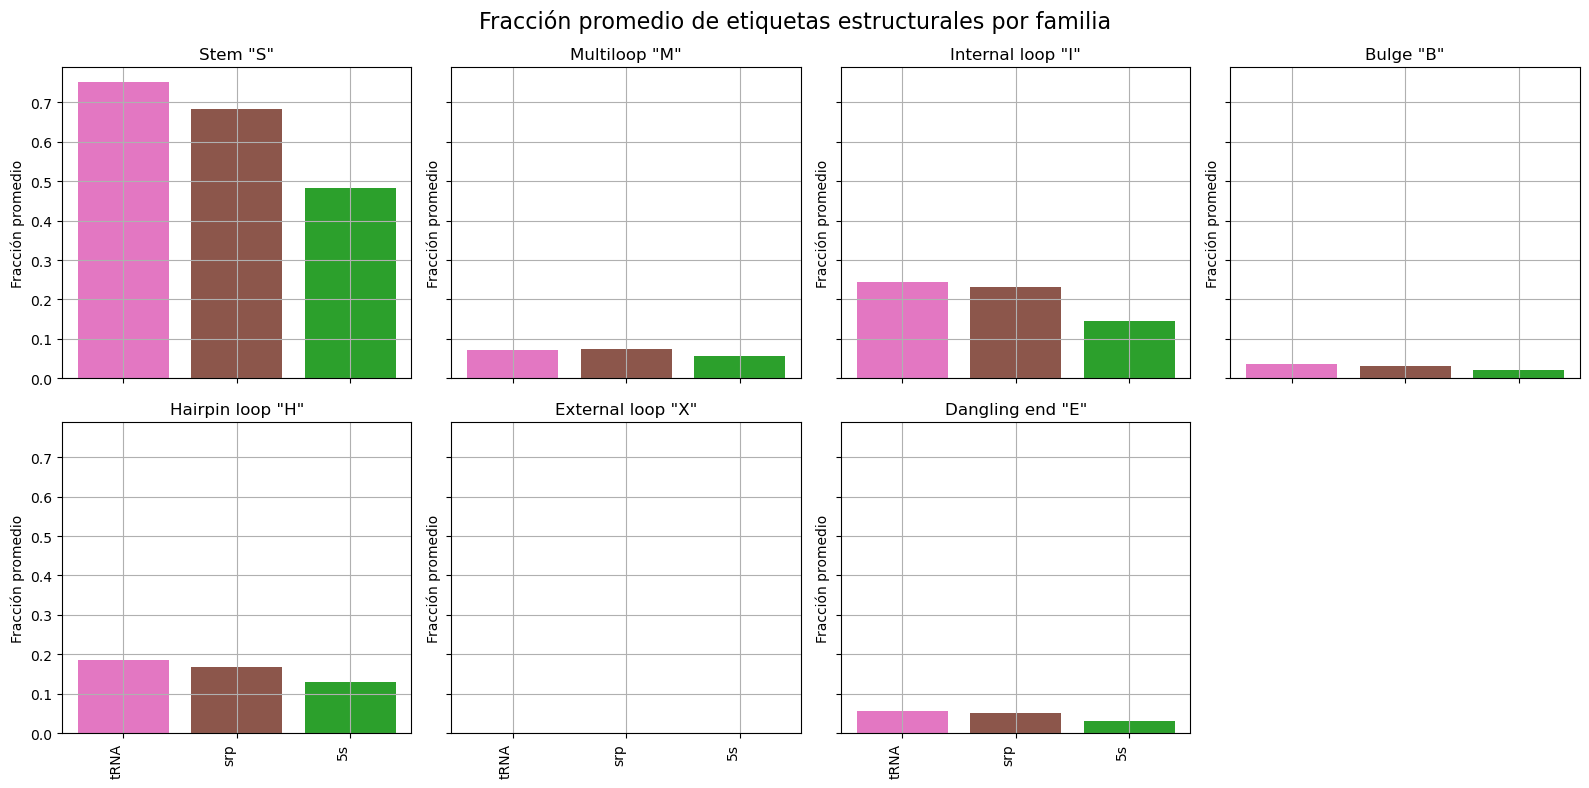

In [12]:
df0 = df_all.query('fold == 0')
# Definir tipos de etiqueta
label_types = ['S', 'M', 'I', 'B', 'H', 'X', 'E']
n_labels = len(label_types)

label_map = {'S': 'Stem',
    'M': 'Multiloop',
    'I': 'Internal loop',
    'B': 'Bulge',
    'H': 'Hairpin loop',
    'X': 'External loop',
    'E': 'Dangling end'}

families = sorted(df['fam'].unique())
cmap = plt.get_cmap('tab10')
color_map = {fam: cmap(i % cmap.N) for i, fam in enumerate(families)}

# Contar etiquetas por secuencia y crear DataFrame
label_counts = df0['motifs'].apply(lambda s: Counter(s))
label_counts_df = pd.DataFrame(label_counts.tolist()).fillna(0)[label_types]

# Dividir cada cuenta por la longitud de su secuencia para obtener fracción
label_frac_df = label_counts_df.div(df0['len'], axis=0)

# Calcular promedio de fracción por familia
avg_frac = label_frac_df.join(df0['fam']).groupby('fam').mean()

# Crear figura con subplots
n_motivos = len(label_types)
cols = 4
rows = (n_labels + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(16, 8), sharex=True, sharey=True)

for idx, label in enumerate(label_types):
    ax = axes[idx // cols, idx % cols]
    data = avg_frac[label].sort_values(ascending=False)
    ax.bar(data.index, data.values, color=[color_map[f] for f in data.index])
    ax.set_title(f'{label_map[label]} "{label}"')
    ax.set_xticklabels(data.index, rotation=90, ha='right')
    ax.set_ylabel('Fracción promedio')
    ax.grid()
    # ax.set_ylim(0, data.max() * 1.1)

# Desactivar subplots vacíos
for idx in range(n_motivos, rows * cols):
    fig.delaxes(axes[idx // cols, idx % cols])
fig.suptitle('Fracción promedio de etiquetas estructurales por familia', fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
df0 = df_all.query('fold == 0')
# Definir tipos de etiqueta
label_types = ['S', 'M', 'I', 'B', 'H', 'X', 'E']
n_labels = len(label_types)

label_map = {'S': 'Stem',
    'M': 'Multiloop',
    'I': 'Internal loop',
    'B': 'Bulge',
    'H': 'Hairpin loop',
    'X': 'External loop',
    'E': 'Dangling end'}

families = sorted(df['fam'].unique())
cmap = plt.get_cmap('tab10')
color_map = {fam: cmap(i % cmap.N) for i, fam in enumerate(families)}

# Contar etiquetas por secuencia y crear DataFrame
label_counts = df0['motifs'].apply(lambda s: Counter(s))
label_counts_df = pd.DataFrame(label_counts.tolist()).fillna(0)[label_types]

# Dividir cada cuenta por la longitud de su secuencia para obtener fracción
label_frac_df = label_counts_df.div(df0['len'], axis=0)

# Calcular promedio de fracción por familia
avg_frac = label_frac_df.join(df0['fam']).groupby('motifs').mean()

# Crear figura con subplots
n_fam = 3 
rows = (n_labels + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(16, 8), sharex=True, sharey=True)

for idx, label in enumerate(label_types):
    ax = axes[idx // cols, idx % cols]
    data = avg_frac[label].sort_values(ascending=False)
    ax.bar(data.index, data.values, color=[color_map[f] for f in data.index])
    ax.set_title(f'{label_map[label]} "{label}"')
    ax.set_xticklabels(data.index, rotation=90, ha='right')
    ax.set_ylabel('Fracción promedio')
    ax.grid()
    # ax.set_ylim(0, data.max() * 1.1)

# Desactivar subplots vacíos
for idx in range(n_motivos, rows * cols):
    fig.delaxes(axes[idx // cols, idx % cols])
fig.suptitle('Fracción promedio de etiquetas estructurales por familia', fontsize=16)
plt.tight_layout()
plt.show()
